<a href="https://colab.research.google.com/github/RJuro/am-21/blob/main/Aflevering_2_fors%C3%B8g.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. forsøg - Aflevering i Anvendt Matematik

Du SKAL besvare de 2 dele for at komme videre til eksamen.

## 1. Lineær Algebra

![](https://source.unsplash.com/MAVgiId1FKk)

Juice-kæden "Juicy Jack" overveje at introducere 3 nye typer af produkter og laver en lille regning for en dag for at finde uf af hvor meget de skal producere og markedsføre de forskellige produkter.

### Priser
* "WAKE UP CALL" - 56 dkk/kop
* "HAPPY FLAPPY" - 48 dkk/kop
* "SLUMBER JACK" - 62 dkk/kop

### Ingredienser (per kop):

1.   Æble juice:
    * 160 ml til "WAKE UP CALL"
    * 240 ml til "HAPPY FLAPPY"
    * 75 ml til "SLUMBER JACK"

2.   Ingefær juice:
    * 11 ml til "WAKE UP CALL"
    * 2.4 ml til "HAPPY FLAPPY"
    * 4.6 ml til "SLUMBER JACK"

3.   Passionsfrugt juice:
    * 9 ml til "WAKE UP CALL"
    * 72 ml til "HAPPY FLAPPY"
    * 135 ml til "SLUMBER JACK"

### Hvad der kan max produceres af de forskelliger ingredienser per uge (andel reserveret til de 3 nye produkter)
*  105 liter Æble juice
*   3.2 liter Ingefær juice
*   45 liter Passionsfrugt juice

I denne opgave skal vi tænke på en måde, hvor ingredienser skal fordeles på de forskellige produkter f.eks:

$160x + 240y + 75z = 105000$ for æblejuicen.

#### 1.1 Brug sympy til at opstille ligninger for alle ingredienser


In [5]:
# importer pakker
from sympy import *
import numpy as np
np.set_printoptions(suppress=True)
from scipy import linalg


In [6]:
# definer symboler
x, y, z = symbols('x, y, z')

# definer ligninger
eq1 = Eq(160*x + 240*y + 75*z, 105000) # æblejuice fordeling
eq2 = Eq(11*x + 2.4*y + 4.6*z, 3200)   
eq3 = Eq(9*x + 72*y + 135*z, 45000)   

In [7]:
# vis ligning 1
eq1

Eq(160*x + 240*y + 75*z, 105000)

In [8]:
# vis ligning 2
eq2

Eq(11*x + 2.4*y + 4.6*z, 3200)

In [9]:
# vis ligning 3
eq3

Eq(9*x + 72*y + 135*z, 45000)

#### 1.2 Skriv ligninger om til matrix form.

Opstil først matrix $A$ og vector $\vec{b}$

In [10]:
# definer matrix A
matrix_a = np.array([
[160,	240, 75],
[11, 2.4, 4.6],
[9, 72, 135]
])

# definer vector b
vector_b = np.array([105000, 3200, 45000])

In [11]:
# vis matrix A
Matrix(matrix_a)

Matrix([
[160.0, 240.0,  75.0],
[ 11.0,   2.4,   4.6],
[  9.0,  72.0, 135.0]])

In [12]:
# vis vector b
Matrix(vector_b)

Matrix([
[105000],
[  3200],
[ 45000]])

#### 1.3 Beregn $A^{-1}$ ved at bruge numpy funktion til dette.

In [13]:
# beregn inverse af A og print ud
matrix_a_inverse = np.linalg.inv(matrix_a)

print(matrix_a_inverse)

[[ 0.00002484  0.09315613 -0.00318801]
 [ 0.00498075 -0.072196   -0.00030707]
 [-0.00265805  0.03229412  0.00778371]]


#### 1.4 Vis, at $A^{-1}A = I$

In [14]:
# beregn dotproduct af A^-1 og matrix A, vis at det er lige med I, print I
identity_matrix=np.dot(matrix_a_inverse, matrix_a)

print(identity_matrix)

[[ 1.  0. -0.]
 [ 0.  1.  0.]
 [-0. -0.  1.]]


#### 1.5 Beregn $\vec{x}$ 
Vi ved, at $I\vec{x}=\vec{x}$ og derfor bliver $A^{-1}A\vec{x}=A^{-1}\vec{b}$ til $\vec{x} = A^{-1}\vec{b}$

In [15]:
# beregn vector x med løsninger for hvor mange kopper der skal juices...
vector_x=np.dot(matrix_a_inverse,vector_b)

print(vector_x) 

[157.24754689 278.13315116 174.51248292]


Tjek om din løsning passer ved at beregne med Scipy og Sympy

In [16]:
# tjek med sympy
solutions = linalg.solve(matrix_a,vector_b)
print(solutions)

[157.24754689 278.13315116 174.51248292]


In [17]:
# tjek med sympy
solve((eq1, eq2, eq3), (x, y, z))

{x: 157.247546888585, y: 278.133151161346, z: 174.512482921376}

#### 1.6 Hvor meget kan man så sælge for om ugen på disse drinks? (husk at runde ned)

In [18]:
# hvor mange penge sælger de for om ugen?
157*56 + 278*48 + 62*174

32924

# Opgave 2 - Calculus

I denne del arbejder vi med funktionen $f(x) = 1+80x^3+5x^4-2x^5$

In [19]:
# import af alle pakker, som der er brug for i opgaven

import numpy as np
import matplotlib.pyplot as plt
from sympy import *

### 1.1 - Plot funktionen 

- brug numpy og pyplot/matplotlib
- plot for $-5 ≤ x ≤ 5$

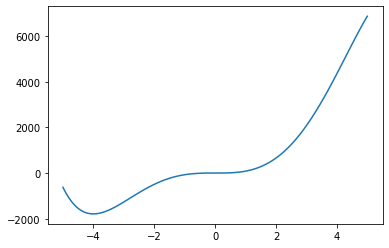

In [20]:
# brug np.linspace til at generere 100 værdier og plot funktionen
x = np.linspace(-5, 5, num=100)
y = 1 + 80*x**3 + 5*x**4 - 2*x**5

plt.plot(x,y)

### 1.2 - Find sekantlinjen 

- Beregn den lineære ligning $s = mx+b$ der beskriver sekanten i de to punkter $x_1 = -1$ og $x_2 = 4$
- Du skal først finde $y_1, y_2$ og $m, b$
- plot $f(x)$ og $s(x)$

OBS: der bruges lidt afvigende variablebetegnelser (fra de matematiske udtryk) i koden.



In [21]:
# definer symboler og funktionen (brug x0 i stedet for x)
x0 = symbols('x0')

f = 1 + 80*x0**3 + 5*x0**4 - 2*x0**5
f

-2*x0**5 + 5*x0**4 + 80*x0**3 + 1

In [22]:
# beregn y1 og y2 i SymPy
x1 = -1
x2 = 4

y1 = f.subs(x0,x1)
y2 = f.subs(x0,x2)

In [23]:
print(y1)
print(y2)

-72
4353


In [26]:
# beregn hældningen m
m = (y2-y1)/(x2-x1)

In [27]:
# beregn b ved at omskrive s = m*x + b

b = y1 - m* x1

In [28]:
b

813

In [29]:
# beregn alle s-værdier ved at indsætte x-værdier som blev genereret med linspace
s = m*x + b

In [31]:
s

array([-3612.00000000000, -3522.60606060606, -3433.21212121212,
       -3343.81818181818, -3254.42424242424, -3165.03030303030,
       -3075.63636363636, -2986.24242424242, -2896.84848484848,
       -2807.45454545455, -2718.06060606061, -2628.66666666667,
       -2539.27272727273, -2449.87878787879, -2360.48484848485,
       -2271.09090909091, -2181.69696969697, -2092.30303030303,
       -2002.90909090909, -1913.51515151515, -1824.12121212121,
       -1734.72727272727, -1645.33333333333, -1555.93939393939,
       -1466.54545454545, -1377.15151515152, -1287.75757575758,
       -1198.36363636364, -1108.96969696970, -1019.57575757576,
       -930.181818181818, -840.787878787879, -751.393939393939,
       -662.000000000000, -572.606060606061, -483.212121212121,
       -393.818181818182, -304.424242424242, -215.030303030303,
       -125.636363636364, -36.2424242424240, 53.1515151515148,
       142.545454545454, 231.939393939394, 321.333333333333,
       410.727272727272, 500.121212121212, 5

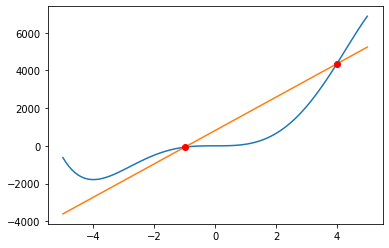

In [30]:
# plot f(x) og s(x) som går gennem x1 og x2
plt.plot(x,y)
plt.plot(x,s)

plt.plot([x1,x2],[y1,y2], 'o', c='red') #extra :-)

### 1.3 - Find tangentlinjen 

- Beregn den lineære ligning $t = mx+b$ der beskriver tangenten i $x_3 = -1.5$
- Du skal først finde $y_3$
- Brug **differenskvotienten** og beregn hældning i $x_3$ for $\lim_{h\to0}$
- plot $f(x)$ og $t(x)$

OBS: der bruges lidt afvigende variablebetegnelser (fra de matematiske udtryk) i koden.


In [32]:
# beregn y3 ved at indsætte x3

x3 = -1.5
y3 = f.subs(x0, x3)

In [33]:
# definer h symbollet
h = symbols('h')

In [34]:
# definer f(x+h) ved at erstatte x0 for x0+h i f(x)
fh = f.subs(x0, x0+h)

In [35]:
fh

-2*(h + x0)**5 + 5*(h + x0)**4 + 80*(h + x0)**3 + 1

In [36]:
# definer ligninen for hældning af tangenten mt
# udskriv mt og kontroler
mt = (fh-f)/h

In [37]:
mt

(2*x0**5 - 5*x0**4 - 80*x0**3 - 2*(h + x0)**5 + 5*(h + x0)**4 + 80*(h + x0)**3)/h

Differenskvotienten burde være:
$$\frac{2 x_{0}^{5} - 5 x_{0}^{4} - 80 x_{0}^{3} - 2 \left(h + x_{0}\right)^{5} + 5 \left(h + x_{0}\right)^{4} + 80 \left(h + x_{0}\right)^{3}}{h}$$

In [38]:
# beregn hældningen m3 i x3 ved at regne grænseværdien for h -> 0 og indsætte x3
m3 = mt.limit(h, 0).subs(x0, x3)

In [39]:
# beregn b3 ved at omkskrive t = m3 * x + b3

b3 = y3 - m3 * x3

In [40]:
# beregn alle t-værdier ved at indsætte x-værdier som blev genereret med linspace
t = m3*x + b3

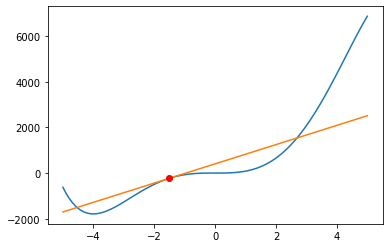

In [41]:
# plot f(x) og t(x) i x3
plt.plot(x,y)
plt.plot(x,t)

plt.plot(x3,y3,'o', c='red')

### 1.4 - Find ekstrempunkter

- Brug SymPy og differentering til at finde maximum og minimum i $f(x)$
- Brug først `factor()` funktionen, som kan hjælpe med at finde ekstrempunkter "manuelt"
- Vis derefter, hvordan man kan finde punkterne "automatisk"
- Lav manuel test for min/max ved at se på ændinger i fortegn

In [42]:
# find den afledede funktion fd (sympy) og udskriv
fd = f.diff()
fd

-10*x0**4 + 20*x0**3 + 240*x0**2

In [43]:
# brug faktorisering til at se, om du kan beregne ekstrempunkter direkte
factor(fd)

-10*x0**2*(x0 - 6)*(x0 + 4)

In [44]:
# brug sympy til at finde de 2 ekstrempunkter
solveset(fd, x0)

FiniteSet(-4, 0, 6)

In [45]:
# generer værdier som kan bruges for at undersøge ændringer af fortegn
sign_chart = [-5,-4,-2,-1,0,1,3,6,7]

In [46]:
# beregn hældningsværdier (list-comprehension)
[fd.subs(x0,i) for i in sign_chart]

[-2750, 0, 640, 210, 0, 250, 1890, 0, -5390]

In [ ]:
# hvilken slags punkter handler det sig om?

# -4 : minimum
# 0: overgang
# 6: maximum

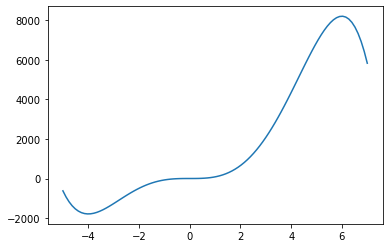

In [47]:
x = np.linspace(-5, 7, num=100)
y = 1 + 80*x**3 + 5*x**4 - 2*x**5

plt.plot(x,y)